<p>
<img src="http://www.cerm.unifi.it/chianti/images/logo%20unifi_positivo.jpg" 
        alt="UniFI logo" style="float: left; width: 20%; height: 20%;">
<div align="right">
Donatella Merlini<br>
Massimo Nocentini<br>
<small>
<br>October 20, 2016: some Riordan patterns
</small>
</div>
</p>
<br>
<div align="center">
<b>Abstract</b><br>
A notebook to support an ongoing work <i>Algebraic generating functions for languages
avoiding Riordan patterns</i>.
</div>

In [1]:
from sympy import *

from IPython.display import Markdown, Latex
from oeis import oeis_search

init_printing()

In [71]:
%run ~/Developer/working-copies/programming-contests/competitive-programming/python-libs/oeis.py

## defs

In [39]:
j = symbols('j', positive=True)
t = symbols('t')

j_range = range(1, 10)

In [4]:
def make_expander(gf, t, terms_in_expansion = 15):
    
    def worker(j_index):
        term = Subs(gf, j, j_index)
        return Eq(j, j_index), Eq(term, term.doit().series(t, n=terms_in_expansion)) 

    return worker

def coeffs(res, t, limit):
    return [res.rhs.coeff(t, n) for n in range(limit)]

def match_table(results, gf_col_width="12cm"):
    rows = []
    for j_eq, res in results:
        j, j_index = j_eq.lhs, j_eq.rhs
        terms_in_expansion = res.rhs.getn()
        searchable = oeis_search(seq=coeffs(res, t, limit=terms_in_expansion), 
                                 only_possible_matchings=True, progress_indicator=None)
        row_src = searchable(term_src=latex(res.lhs))
        rows.append(row_src)

    header_row = r'<tr><th style="width:{width};" >gf</th><th>matches</th></tr>'.format(width=gf_col_width)
    return Markdown('<table style="width:100%">\n {header}\n {rows}\n </table>'.format(
            header=header_row, rows='\n'.join(rows)))

def coeffs_table(results):

    def coeffs_table_rows():

        rows = []
        for j_eq, res in results:
            j, j_index = j_eq.lhs, j_eq.rhs
            terms_in_expansion = res.rhs.getn()
            coefficients = coeffs(res, t, limit=terms_in_expansion)
            rows.append(latex(j_eq) + ' & ' + latex(coefficients))

        return rows
    
    return Latex(r'\begin{{array}}{{r|l}} {rows} \end{{array}}'.format(rows=r'\\'.join(coeffs_table_rows())))

## testing

In [5]:
def fib(t):
    return t/(1-t-t**2)

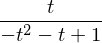

In [6]:
f = fib(t)
f

In [7]:
s = f.series(t, n=10)
s

In [8]:
s.getn()

In [9]:
results = list(map(make_expander(fib(t), t), [1]))

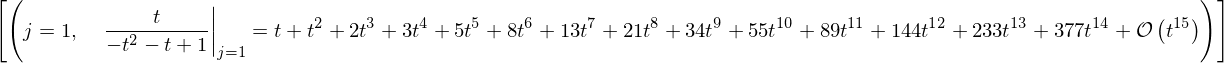

In [10]:
results

In [11]:
coeffs_table(results)

<IPython.core.display.Latex object>

In [12]:
match_table(results)

<table style="width:100%">
 <tr><th style="width:12cm;" >gf</th><th>matches</th></tr>
 <tr><td style="white-space:nowrap;">$$\left. \frac{t}{- t^{2} - t + 1} \right|_{\substack{ j=1 }}$$</td><td><a href='http://oeis.org/A000045'>A000045</a>, <a href='http://oeis.org/A212804'>A212804</a>, <a href='http://oeis.org/A147316'>A147316</a>, <a href='http://oeis.org/A248740'>A248740</a>, <a href='http://oeis.org/A025086'>A025086</a>, <a href='http://oeis.org/A039834'>A039834</a>, <a href='http://oeis.org/A152163'>A152163</a>, <a href='http://oeis.org/A236191'>A236191</a></td></tr>
 </table>

## $\mathfrak{p}={1^{j+1}0^{j}}$

In [14]:
def S(t):
    radix_term = sqrt(1-4*t+4*t**(j+1))
    return 2/(radix_term * (1 + radix_term))

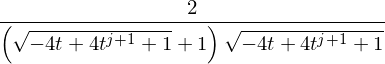

In [15]:
S(t)

In [16]:
results = list(map(make_expander(S(t), t), j_range))
# results

In [17]:
coeffs_table(results)

<IPython.core.display.Latex object>

In [18]:
match_table(results)

<table style="width:100%">
 <tr><th style="width:12cm;" >gf</th><th>matches</th></tr>
 <tr><td style="white-space:nowrap;">$$\left. \frac{2}{\left(\sqrt{- 4 t + 4 t^{j + 1} + 1} + 1\right) \sqrt{- 4 t + 4 t^{j + 1} + 1}} \right|_{\substack{ j=1 }}$$</td><td><a href='http://oeis.org/A000225'>A000225</a>, <a href='http://oeis.org/A126646'>A126646</a>, <a href='http://oeis.org/A168604'>A168604</a>, <a href='http://oeis.org/A255047'>A255047</a>, <a href='http://oeis.org/A239678'>A239678</a>, <a href='http://oeis.org/A060152'>A060152</a>, <a href='http://oeis.org/A225883'>A225883</a></td></tr>
<tr><td style="white-space:nowrap;">$$\left. \frac{2}{\left(\sqrt{- 4 t + 4 t^{j + 1} + 1} + 1\right) \sqrt{- 4 t + 4 t^{j + 1} + 1}} \right|_{\substack{ j=2 }}$$</td><td><a href='http://oeis.org/A261058'>A261058</a></td></tr>
<tr><td style="white-space:nowrap;">$$\left. \frac{2}{\left(\sqrt{- 4 t + 4 t^{j + 1} + 1} + 1\right) \sqrt{- 4 t + 4 t^{j + 1} + 1}} \right|_{\substack{ j=3 }}$$</td><td></td></tr>
<tr><td style="white-space:nowrap;">$$\left. \frac{2}{\left(\sqrt{- 4 t + 4 t^{j + 1} + 1} + 1\right) \sqrt{- 4 t + 4 t^{j + 1} + 1}} \right|_{\substack{ j=4 }}$$</td><td></td></tr>
<tr><td style="white-space:nowrap;">$$\left. \frac{2}{\left(\sqrt{- 4 t + 4 t^{j + 1} + 1} + 1\right) \sqrt{- 4 t + 4 t^{j + 1} + 1}} \right|_{\substack{ j=5 }}$$</td><td></td></tr>
<tr><td style="white-space:nowrap;">$$\left. \frac{2}{\left(\sqrt{- 4 t + 4 t^{j + 1} + 1} + 1\right) \sqrt{- 4 t + 4 t^{j + 1} + 1}} \right|_{\substack{ j=6 }}$$</td><td></td></tr>
<tr><td style="white-space:nowrap;">$$\left. \frac{2}{\left(\sqrt{- 4 t + 4 t^{j + 1} + 1} + 1\right) \sqrt{- 4 t + 4 t^{j + 1} + 1}} \right|_{\substack{ j=7 }}$$</td><td></td></tr>
<tr><td style="white-space:nowrap;">$$\left. \frac{2}{\left(\sqrt{- 4 t + 4 t^{j + 1} + 1} + 1\right) \sqrt{- 4 t + 4 t^{j + 1} + 1}} \right|_{\substack{ j=8 }}$$</td><td></td></tr>
<tr><td style="white-space:nowrap;">$$\left. \frac{2}{\left(\sqrt{- 4 t + 4 t^{j + 1} + 1} + 1\right) \sqrt{- 4 t + 4 t^{j + 1} + 1}} \right|_{\substack{ j=9 }}$$</td><td></td></tr>
 </table>

## $\mathfrak{p}={0^{j+1}1^{j}}$

In [19]:
def S(t):
    radix_term = sqrt(1-4*t+4*t**(j+1))
    return 2*(1-t**j)/(radix_term * (1 + radix_term))

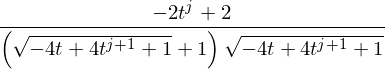

In [20]:
S(t)

In [21]:
results = list(map(make_expander(S(t), t), j_range))

In [22]:
coeffs_table(results)

<IPython.core.display.Latex object>

In [23]:
match_table(results)

<table style="width:100%">
 <tr><th style="width:12cm;" >gf</th><th>matches</th></tr>
 <tr><td style="white-space:nowrap;">$$\left. \frac{- 2 t^{j} + 2}{\left(\sqrt{- 4 t + 4 t^{j + 1} + 1} + 1\right) \sqrt{- 4 t + 4 t^{j + 1} + 1}} \right|_{\substack{ j=1 }}$$</td><td><a href='http://oeis.org/A000079'>A000079</a>, <a href='http://oeis.org/A011782'>A011782</a>, <a href='http://oeis.org/A131577'>A131577</a>, <a href='http://oeis.org/A034008'>A034008</a>, <a href='http://oeis.org/A118655'>A118655</a>, <a href='http://oeis.org/A247208'>A247208</a>, <a href='http://oeis.org/A138882'>A138882</a>, <a href='http://oeis.org/A166444'>A166444</a>, <a href='http://oeis.org/A139248'>A139248</a>, <a href='http://oeis.org/A220493'>A220493</a></td></tr>
<tr><td style="white-space:nowrap;">$$\left. \frac{- 2 t^{j} + 2}{\left(\sqrt{- 4 t + 4 t^{j + 1} + 1} + 1\right) \sqrt{- 4 t + 4 t^{j + 1} + 1}} \right|_{\substack{ j=2 }}$$</td><td></td></tr>
<tr><td style="white-space:nowrap;">$$\left. \frac{- 2 t^{j} + 2}{\left(\sqrt{- 4 t + 4 t^{j + 1} + 1} + 1\right) \sqrt{- 4 t + 4 t^{j + 1} + 1}} \right|_{\substack{ j=3 }}$$</td><td></td></tr>
<tr><td style="white-space:nowrap;">$$\left. \frac{- 2 t^{j} + 2}{\left(\sqrt{- 4 t + 4 t^{j + 1} + 1} + 1\right) \sqrt{- 4 t + 4 t^{j + 1} + 1}} \right|_{\substack{ j=4 }}$$</td><td></td></tr>
<tr><td style="white-space:nowrap;">$$\left. \frac{- 2 t^{j} + 2}{\left(\sqrt{- 4 t + 4 t^{j + 1} + 1} + 1\right) \sqrt{- 4 t + 4 t^{j + 1} + 1}} \right|_{\substack{ j=5 }}$$</td><td></td></tr>
<tr><td style="white-space:nowrap;">$$\left. \frac{- 2 t^{j} + 2}{\left(\sqrt{- 4 t + 4 t^{j + 1} + 1} + 1\right) \sqrt{- 4 t + 4 t^{j + 1} + 1}} \right|_{\substack{ j=6 }}$$</td><td></td></tr>
<tr><td style="white-space:nowrap;">$$\left. \frac{- 2 t^{j} + 2}{\left(\sqrt{- 4 t + 4 t^{j + 1} + 1} + 1\right) \sqrt{- 4 t + 4 t^{j + 1} + 1}} \right|_{\substack{ j=7 }}$$</td><td></td></tr>
<tr><td style="white-space:nowrap;">$$\left. \frac{- 2 t^{j} + 2}{\left(\sqrt{- 4 t + 4 t^{j + 1} + 1} + 1\right) \sqrt{- 4 t + 4 t^{j + 1} + 1}} \right|_{\substack{ j=8 }}$$</td><td></td></tr>
<tr><td style="white-space:nowrap;">$$\left. \frac{- 2 t^{j} + 2}{\left(\sqrt{- 4 t + 4 t^{j + 1} + 1} + 1\right) \sqrt{- 4 t + 4 t^{j + 1} + 1}} \right|_{\substack{ j=9 }}$$</td><td></td></tr>
 </table>

## $\mathfrak{p}={1^{j}0^{j}}$

In [24]:
def S(t):
    radix_term = sqrt(1-4*t+2*t**j+t**(2*j))
    return 2/(radix_term * (1 -t**j + radix_term))

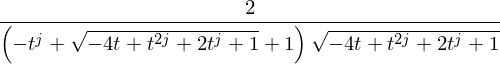

In [25]:
S(t)

In [26]:
results = list(map(make_expander(S(t), t), j_range))

In [27]:
coeffs_table(results)

<IPython.core.display.Latex object>

In [28]:
match_table(results)

<table style="width:100%">
 <tr><th style="width:12cm;" >gf</th><th>matches</th></tr>
 <tr><td style="white-space:nowrap;">$$\left. \frac{2}{\left(- t^{j} + \sqrt{- 4 t + t^{2 j} + 2 t^{j} + 1} + 1\right) \sqrt{- 4 t + t^{2 j} + 2 t^{j} + 1}} \right|_{\substack{ j=1 }}$$</td><td><a href='http://oeis.org/A000027'>A000027</a>, <a href='http://oeis.org/A001477'>A001477</a>, <a href='http://oeis.org/A028310'>A028310</a>, <a href='http://oeis.org/A067080'>A067080</a>, <a href='http://oeis.org/A038566'>A038566</a>, <a href='http://oeis.org/A053645'>A053645</a>, <a href='http://oeis.org/A194029'>A194029</a>, <a href='http://oeis.org/A023443'>A023443</a>, <a href='http://oeis.org/A053186'>A053186</a>, <a href='http://oeis.org/A271980'>A271980</a></td></tr>
<tr><td style="white-space:nowrap;">$$\left. \frac{2}{\left(- t^{j} + \sqrt{- 4 t + t^{2 j} + 2 t^{j} + 1} + 1\right) \sqrt{- 4 t + t^{2 j} + 2 t^{j} + 1}} \right|_{\substack{ j=2 }}$$</td><td></td></tr>
<tr><td style="white-space:nowrap;">$$\left. \frac{2}{\left(- t^{j} + \sqrt{- 4 t + t^{2 j} + 2 t^{j} + 1} + 1\right) \sqrt{- 4 t + t^{2 j} + 2 t^{j} + 1}} \right|_{\substack{ j=3 }}$$</td><td></td></tr>
<tr><td style="white-space:nowrap;">$$\left. \frac{2}{\left(- t^{j} + \sqrt{- 4 t + t^{2 j} + 2 t^{j} + 1} + 1\right) \sqrt{- 4 t + t^{2 j} + 2 t^{j} + 1}} \right|_{\substack{ j=4 }}$$</td><td></td></tr>
<tr><td style="white-space:nowrap;">$$\left. \frac{2}{\left(- t^{j} + \sqrt{- 4 t + t^{2 j} + 2 t^{j} + 1} + 1\right) \sqrt{- 4 t + t^{2 j} + 2 t^{j} + 1}} \right|_{\substack{ j=5 }}$$</td><td></td></tr>
<tr><td style="white-space:nowrap;">$$\left. \frac{2}{\left(- t^{j} + \sqrt{- 4 t + t^{2 j} + 2 t^{j} + 1} + 1\right) \sqrt{- 4 t + t^{2 j} + 2 t^{j} + 1}} \right|_{\substack{ j=6 }}$$</td><td></td></tr>
<tr><td style="white-space:nowrap;">$$\left. \frac{2}{\left(- t^{j} + \sqrt{- 4 t + t^{2 j} + 2 t^{j} + 1} + 1\right) \sqrt{- 4 t + t^{2 j} + 2 t^{j} + 1}} \right|_{\substack{ j=7 }}$$</td><td></td></tr>
<tr><td style="white-space:nowrap;">$$\left. \frac{2}{\left(- t^{j} + \sqrt{- 4 t + t^{2 j} + 2 t^{j} + 1} + 1\right) \sqrt{- 4 t + t^{2 j} + 2 t^{j} + 1}} \right|_{\substack{ j=8 }}$$</td><td></td></tr>
<tr><td style="white-space:nowrap;">$$\left. \frac{2}{\left(- t^{j} + \sqrt{- 4 t + t^{2 j} + 2 t^{j} + 1} + 1\right) \sqrt{- 4 t + t^{2 j} + 2 t^{j} + 1}} \right|_{\substack{ j=9 }}$$</td><td></td></tr>
 </table>

## $\mathfrak{p}={(10)}^{j}1$

In [29]:
def S(t):
    radix_term = sqrt(1-4*t+2*t**(j+1)+4*t**(j+2)-3*t**(2*j+2))
    return 2*(1-t**j)/(1-4*t**j+3*t**(j+1)+radix_term)

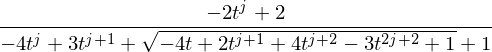

In [30]:
S(t)

In [31]:
results = list(map(make_expander(S(t), t), j_range))

In [32]:
coeffs_table(results)

<IPython.core.display.Latex object>

In [33]:
match_table(results)

<table style="width:100%">
 <tr><th style="width:12cm;" >gf</th><th>matches</th></tr>
 <tr><td style="white-space:nowrap;">$$\left. \frac{- 2 t^{j} + 2}{- 4 t^{j} + 3 t^{j + 1} + \sqrt{- 4 t + 2 t^{j + 1} + 4 t^{j + 2} - 3 t^{2 j + 2} + 1} + 1} \right|_{\substack{ j=1 }}$$</td><td><a href='http://oeis.org/A005773'>A005773</a></td></tr>
<tr><td style="white-space:nowrap;">$$\left. \frac{- 2 t^{j} + 2}{- 4 t^{j} + 3 t^{j + 1} + \sqrt{- 4 t + 2 t^{j + 1} + 4 t^{j + 2} - 3 t^{2 j + 2} + 1} + 1} \right|_{\substack{ j=2 }}$$</td><td></td></tr>
<tr><td style="white-space:nowrap;">$$\left. \frac{- 2 t^{j} + 2}{- 4 t^{j} + 3 t^{j + 1} + \sqrt{- 4 t + 2 t^{j + 1} + 4 t^{j + 2} - 3 t^{2 j + 2} + 1} + 1} \right|_{\substack{ j=3 }}$$</td><td></td></tr>
<tr><td style="white-space:nowrap;">$$\left. \frac{- 2 t^{j} + 2}{- 4 t^{j} + 3 t^{j + 1} + \sqrt{- 4 t + 2 t^{j + 1} + 4 t^{j + 2} - 3 t^{2 j + 2} + 1} + 1} \right|_{\substack{ j=4 }}$$</td><td></td></tr>
<tr><td style="white-space:nowrap;">$$\left. \frac{- 2 t^{j} + 2}{- 4 t^{j} + 3 t^{j + 1} + \sqrt{- 4 t + 2 t^{j + 1} + 4 t^{j + 2} - 3 t^{2 j + 2} + 1} + 1} \right|_{\substack{ j=5 }}$$</td><td></td></tr>
<tr><td style="white-space:nowrap;">$$\left. \frac{- 2 t^{j} + 2}{- 4 t^{j} + 3 t^{j + 1} + \sqrt{- 4 t + 2 t^{j + 1} + 4 t^{j + 2} - 3 t^{2 j + 2} + 1} + 1} \right|_{\substack{ j=6 }}$$</td><td></td></tr>
<tr><td style="white-space:nowrap;">$$\left. \frac{- 2 t^{j} + 2}{- 4 t^{j} + 3 t^{j + 1} + \sqrt{- 4 t + 2 t^{j + 1} + 4 t^{j + 2} - 3 t^{2 j + 2} + 1} + 1} \right|_{\substack{ j=7 }}$$</td><td></td></tr>
<tr><td style="white-space:nowrap;">$$\left. \frac{- 2 t^{j} + 2}{- 4 t^{j} + 3 t^{j + 1} + \sqrt{- 4 t + 2 t^{j + 1} + 4 t^{j + 2} - 3 t^{2 j + 2} + 1} + 1} \right|_{\substack{ j=8 }}$$</td><td></td></tr>
<tr><td style="white-space:nowrap;">$$\left. \frac{- 2 t^{j} + 2}{- 4 t^{j} + 3 t^{j + 1} + \sqrt{- 4 t + 2 t^{j + 1} + 4 t^{j + 2} - 3 t^{2 j + 2} + 1} + 1} \right|_{\substack{ j=9 }}$$</td><td></td></tr>
 </table>

## $\mathfrak{p}={(01)}^{j}0$

In [34]:
def S(t):
    radix_term = sqrt(1-4*t+2*t**(j+1)+4*t**(j+2)-3*t**(2*j+2))
    return 2*(1-t**j-t**(j+1)+t**(2*j+1))/(radix_term * (1 -2*t**j +t**(j+1) + radix_term))

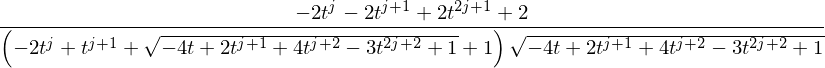

In [35]:
S(t)

In [36]:
results = list(map(make_expander(S(t), t), j_range))

In [37]:
coeffs_table(results)

<IPython.core.display.Latex object>

In [38]:
match_table(results, gf_col_width="18cm")

<table style="width:100%">
 <tr><th style="width:18cm;" >gf</th><th>matches</th></tr>
 <tr><td style="white-space:nowrap;">$$\left. \frac{- 2 t^{j} - 2 t^{j + 1} + 2 t^{2 j + 1} + 2}{\left(- 2 t^{j} + t^{j + 1} + \sqrt{- 4 t + 2 t^{j + 1} + 4 t^{j + 2} - 3 t^{2 j + 2} + 1} + 1\right) \sqrt{- 4 t + 2 t^{j + 1} + 4 t^{j + 2} - 3 t^{2 j + 2} + 1}} \right|_{\substack{ j=1 }}$$</td><td><a href='http://oeis.org/A025566'>A025566</a></td></tr>
<tr><td style="white-space:nowrap;">$$\left. \frac{- 2 t^{j} - 2 t^{j + 1} + 2 t^{2 j + 1} + 2}{\left(- 2 t^{j} + t^{j + 1} + \sqrt{- 4 t + 2 t^{j + 1} + 4 t^{j + 2} - 3 t^{2 j + 2} + 1} + 1\right) \sqrt{- 4 t + 2 t^{j + 1} + 4 t^{j + 2} - 3 t^{2 j + 2} + 1}} \right|_{\substack{ j=2 }}$$</td><td></td></tr>
<tr><td style="white-space:nowrap;">$$\left. \frac{- 2 t^{j} - 2 t^{j + 1} + 2 t^{2 j + 1} + 2}{\left(- 2 t^{j} + t^{j + 1} + \sqrt{- 4 t + 2 t^{j + 1} + 4 t^{j + 2} - 3 t^{2 j + 2} + 1} + 1\right) \sqrt{- 4 t + 2 t^{j + 1} + 4 t^{j + 2} - 3 t^{2 j + 2} + 1}} \right|_{\substack{ j=3 }}$$</td><td></td></tr>
<tr><td style="white-space:nowrap;">$$\left. \frac{- 2 t^{j} - 2 t^{j + 1} + 2 t^{2 j + 1} + 2}{\left(- 2 t^{j} + t^{j + 1} + \sqrt{- 4 t + 2 t^{j + 1} + 4 t^{j + 2} - 3 t^{2 j + 2} + 1} + 1\right) \sqrt{- 4 t + 2 t^{j + 1} + 4 t^{j + 2} - 3 t^{2 j + 2} + 1}} \right|_{\substack{ j=4 }}$$</td><td></td></tr>
<tr><td style="white-space:nowrap;">$$\left. \frac{- 2 t^{j} - 2 t^{j + 1} + 2 t^{2 j + 1} + 2}{\left(- 2 t^{j} + t^{j + 1} + \sqrt{- 4 t + 2 t^{j + 1} + 4 t^{j + 2} - 3 t^{2 j + 2} + 1} + 1\right) \sqrt{- 4 t + 2 t^{j + 1} + 4 t^{j + 2} - 3 t^{2 j + 2} + 1}} \right|_{\substack{ j=5 }}$$</td><td></td></tr>
<tr><td style="white-space:nowrap;">$$\left. \frac{- 2 t^{j} - 2 t^{j + 1} + 2 t^{2 j + 1} + 2}{\left(- 2 t^{j} + t^{j + 1} + \sqrt{- 4 t + 2 t^{j + 1} + 4 t^{j + 2} - 3 t^{2 j + 2} + 1} + 1\right) \sqrt{- 4 t + 2 t^{j + 1} + 4 t^{j + 2} - 3 t^{2 j + 2} + 1}} \right|_{\substack{ j=6 }}$$</td><td></td></tr>
<tr><td style="white-space:nowrap;">$$\left. \frac{- 2 t^{j} - 2 t^{j + 1} + 2 t^{2 j + 1} + 2}{\left(- 2 t^{j} + t^{j + 1} + \sqrt{- 4 t + 2 t^{j + 1} + 4 t^{j + 2} - 3 t^{2 j + 2} + 1} + 1\right) \sqrt{- 4 t + 2 t^{j + 1} + 4 t^{j + 2} - 3 t^{2 j + 2} + 1}} \right|_{\substack{ j=7 }}$$</td><td></td></tr>
<tr><td style="white-space:nowrap;">$$\left. \frac{- 2 t^{j} - 2 t^{j + 1} + 2 t^{2 j + 1} + 2}{\left(- 2 t^{j} + t^{j + 1} + \sqrt{- 4 t + 2 t^{j + 1} + 4 t^{j + 2} - 3 t^{2 j + 2} + 1} + 1\right) \sqrt{- 4 t + 2 t^{j + 1} + 4 t^{j + 2} - 3 t^{2 j + 2} + 1}} \right|_{\substack{ j=8 }}$$</td><td></td></tr>
<tr><td style="white-space:nowrap;">$$\left. \frac{- 2 t^{j} - 2 t^{j + 1} + 2 t^{2 j + 1} + 2}{\left(- 2 t^{j} + t^{j + 1} + \sqrt{- 4 t + 2 t^{j + 1} + 4 t^{j + 2} - 3 t^{2 j + 2} + 1} + 1\right) \sqrt{- 4 t + 2 t^{j + 1} + 4 t^{j + 2} - 3 t^{2 j + 2} + 1}} \right|_{\substack{ j=9 }}$$</td><td></td></tr>
 </table>

---
<a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-nd/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/">Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 International License</a>.